<a href="https://colab.research.google.com/github/mounika-bhogi/task1-/blob/main/Task1_Prediction_using_supervised_machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP:The Sparks Foundation
# Data Science & Business Analytics Internship
# Author:Bhogi Mounika priya
# Task1: Prediction using Supervised ML
In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they stuided.This is a simple linear regression task it evolves just two variables




In [ ]:
# importing required  libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading data from remote link
url=("http://bit.ly/w-data")
data=pd.read_csv(url)
data.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [ ]:
data.tail(3)

,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the dataset

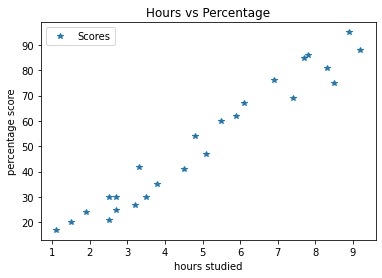

In [ ]:
#plotting the dataset
data.plot(x='Hours', y='Scores', style='*') 
plt.xlabel('hours studied')
plt.ylabel('percentage score') 
plt.title('Hours vs Percentage')    
plt.show()

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


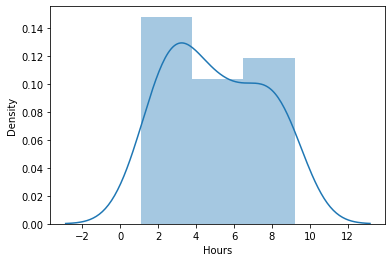

In [ ]:
hours=data['Hours']
scores=data['Scores']
sns.distplot(hours)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


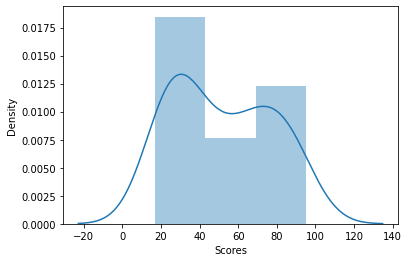

In [ ]:
sns.distplot(scores)

# Linear Regression


## we create two separate variables
one that contains our independent variables(also called the input features)and another one that contains our dependent variable variable(what we want to predict



In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [ ]:
print(y)
print(x)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


# splitting the dataset into the training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [ ]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Training the algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred=regressor.predict(X_test)

# Visualizing the training test results

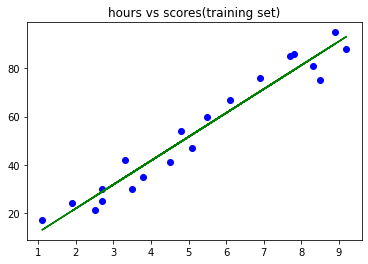

In [ ]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='green')
plt.title('hours vs scores(training set)')
plt.show()

# Visualizing the testing test results

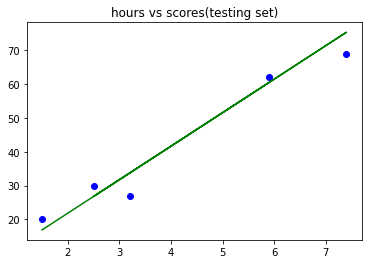

In [ ]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,regressor.predict(X_test),color='green')
plt.title('hours vs scores(testing set)')
plt.show()

# Compared Actual vs Predicted

In [ ]:
data=pd.DataFrame({'Actual': y_test,'Predicted': Y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# predict the score

In [ ]:
h=9.25
s=regressor.predict([[h]])
print("student studies for {} hours per day he/she will score{}% in exam.".format(h,s))

student studies for 9.25 hours per day he/she will score[93.69173249]% in exam.


# Evaluating the model

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,Y_pred))

Mean Absolute Error: 4.183859899002982
